In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [95]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import tensorflow as ts
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
print(ts.__version__)

2.15.0


In [6]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [7]:

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.shape

(768, 9)

In [9]:
dataset=df.values
x=dataset[:,0:8]
y=dataset[:,8]

In [10]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
scalar= StandardScaler()

In [14]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [15]:
model=Sequential()
model.add(Dense(units=12,input_shape=(8,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss="binary_crossentropy", metrics=['accuracy'])

In [17]:
his=model.fit(X_train,y_train,epochs=100,batch_size=60,validation_split=0.1)

Epoch 1/100


10/10 [==============================] - 3s 73ms/step - loss: 0.7705 - accuracy: 0.4457 - val_loss: 0.7700 - val_accuracy: 0.4516
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 0.7391 - accuracy: 0.4692 - val_loss: 0.7455 - val_accuracy: 0.4516
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.7108 - accuracy: 0.5163 - val_loss: 0.7236 - val_accuracy: 0.4839
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6861 - accuracy: 0.5670 - val_loss: 0.7020 - val_accuracy: 0.4839
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.6635 - accuracy: 0.6069 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6431 - accuracy: 0.6322 - val_loss: 0.6673 - val_accuracy: 0.5968
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6252 - accuracy: 0.6612 - val_loss: 0.6530 - val_accuracy: 0.6129
Epoc

Epoch 55/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4450 - accuracy: 0.7989 - val_loss: 0.4977 - val_accuracy: 0.7903
Epoch 56/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4443 - accuracy: 0.8007 - val_loss: 0.4983 - val_accuracy: 0.7903
Epoch 57/100
10/10 [==============================] - 0s 14ms/step - loss: 0.4435 - accuracy: 0.7989 - val_loss: 0.4981 - val_accuracy: 0.7903
Epoch 58/100
10/10 [==============================] - 0s 14ms/step - loss: 0.4426 - accuracy: 0.8007 - val_loss: 0.4980 - val_accuracy: 0.7903
Epoch 59/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4420 - accuracy: 0.7989 - val_loss: 0.4973 - val_accuracy: 0.7903
Epoch 60/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4412 - accuracy: 0.8025 - val_loss: 0.4974 - val_accuracy: 0.7903
Epoch 61/100
10/10 [==============================] - 0s 14ms/step - loss: 0.4406 - accuracy: 0.8025 - val_loss: 0.4975 - val_accuracy: 0.7903

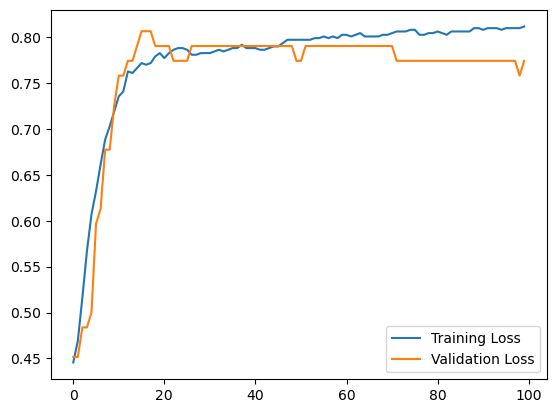

In [18]:
plt.plot(his.history['accuracy'],label='Training Loss')
plt.plot(his.history['val_accuracy'],label='Validation Loss')
plt.legend()
plt.show()

In [20]:
result=model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 10ms/step - loss: 0.5437 - accuracy: 0.7532


In [21]:
result[1]

0.7532467246055603